<a href="https://colab.research.google.com/github/anthony-m-wilson/Data-Analysis/blob/main/Final_Project_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**
# DATA 3300

## Names: Emily Merkey, Abigail Garrard, Jaiden Roper, Anthony Wilson

## **Summary**

**This assignment is broken down into five parts: 170 pts**

1.   **Data Preparation & Data Understanding (40 pts)**
2.   **Unsupervised DM (26 pts)**
3.   **Supervised DM Technique 1 (27 pts)**
4.   **Supervised DM Technique 2 (27 pts**)
5.   **Evaluation of Models & Business Recommendations (50 pts)**

***Each part can be started now, except Part 5. Complete Parts 3 and 4 in order to proceed with Part 5.***





## **Part 1: Data Preparation & Understanding**

### **1A**
### **Data Preparation (16 pts)**

**Import the manager_performance.csv dataset into Python, and clean/transform this data set. If you need some reminders about how to do this, revisit the data preparation module!**



*   **Think about any ethical concerns regarding this dataset. Remove any columns that personally identify employees or could be used to discriminate against employees (sex, marital status, age, sexual orientation, etc.).**
*   **Go through each attribute column and perform various data transformations necessary to cleanse the dataset. For each attribute/column, report each data cleansing step performed and the underlying assumption as to why the data cleansing action was performed.**
  *   **Do not simply state that “all columns were trimmed” or restate the cleansing action itself.**
  *   **State the assumption (e.g., “M” was changed to “Male” because it was assumed that “M” indicated “Male” in this dataset.).**
  *   **Also, if no data transformations were made, state your assumption here as well (all data were assumed to be correct/clean).**


*When you're finished performing all cleaning steps, please display a heading of your finalized df.*

**For this portion of the assignment, fill in the information below to indicate the cleaning actions taken and the assumptions you made. `Manager_ID` has already been filled in, to provide an example.**

## **Data Transformations & Assumptions Outline**

* **Manager_ID**
  * **Action**: None
  * **Assumption**: All values appear correct with no duplicates
* **First_Name**
  * **Action**: Delete
  * **Assumption**: Personal identifier
* **Last_Name**
  * **Action**: Delete
  * **Asumption**: Personal identifier
* **Age**
  * **Action**: Delete
  * **Assumption**: Ethical/descrimintory concern
* **Time_Employed**
  * **Action**: Replace O with 0
  * **Assumption**: O was changed to 0 because we assumed it was inputted incorreclty.
* **Num_Prev_Positions**
  * **Action**: Replace zero with 0
  * **Assumption**: Zero was changed to 0 because we assumed it was inputted incorrectly.
* **Teamwork**
  * **Action**: Replace 100 with 10
  * **Assumption**: 100 was changed to 10 because we assumed a typo accured since 100 is not on the scale from 1-10.
* **Motivation**
  * **Action**: None
  * **Assumption**: All values appear correct with no duplicates
* **Leadership**
  * **Action**: None
  * **Assumption**: All values appear correct with no duplicates
* **Performance_Evaluation**
  * **Action_1**: Replace Loww with Low
  * **Assumption_1**: Loww changed to Low because we assumed an extra letter was added into the data.
  * **Action_2**: Replace Highgh with High
  * **Assumption_2**: Highgh changed to High because we assumed extra letter were inputted into the date.
  * **Action_3**: Replace High  with High
  * **Assumption_3**: High  changed to high because we assumed an extra space was inputted into data.


In [ ]:
# import pandas, numpy, seaborn, and matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import dataset
df = pd.read_csv("/content/manager_performance.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
# preview dataset
df.head()

,Manager_ID,First_Mame,Last_Name,Age,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,James,Butt,44,8,2,4,10,8,high
1,2,Josephine,Darakjy,49,4,3,8,7,8,high
2,3,Art,Venere,70,3,3,1,7,5,low
3,4,Lenna,Paprocki,34,9,1,4,4,5,low
4,5,Donette,Foller,39,7,3,3,2,10,low


In [ ]:
# drop personally identifiable information and any variables that might allow discriminatory practices
df = df.drop(columns = ['First_Mame', 'Last_Name', 'Age'])

In [ ]:
# fix error: replace "O" with '0' for the appropriate variable
# produce value counts for this variable
df['Time_Employed'].value_counts()

8     71
10    71
5     70
1     66
12    66
0     64
15    64
13    63
11    62
2     62
6     60
3     60
7     59
9     58
4     52
14    51
O      1
Name: Time_Employed, dtype: int64

In [ ]:
 df = df.replace(['O'], ['0'])
 df['Time_Employed'].value_counts()

8     71
10    71
5     70
1     66
12    66
0     65
15    64
13    63
11    62
2     62
3     60
6     60
7     59
9     58
4     52
14    51
Name: Time_Employed, dtype: int64

In [ ]:
# fix error: replace "zero" with '0' for the appropriate variable
# produce value counts for this variable
df['Num_Prev_Positions'].value_counts()

1       257
0       256
3       252
2       234
zero      1
Name: Num_Prev_Positions, dtype: int64

In [ ]:
df = df.replace(['zero'], ['0'])
df['Num_Prev_Positions'].value_counts()

1    257
0    257
3    252
2    234
Name: Num_Prev_Positions, dtype: int64

In [ ]:
# replace 100 with 10 for the appropriate variable
# produce value counts for this variable
df['Teamwork'].value_counts()

1      113
2      109
6      107
5      104
4      102
8       97
3       96
9       93
10      93
7       84
100      2
Name: Teamwork, dtype: int64

In [ ]:
df = df.replace(100, 10)
df['Teamwork'].value_counts()

1     113
2     109
6     107
5     104
4     102
8      97
3      96
10     95
9      93
7      84
Name: Teamwork, dtype: int64

In [ ]:
# replace incorrect spellings of high and low with correct spellings for the appropriate variable
# produce value counts for this variable
df['Performance_Evaluation'].value_counts()

low       657
high      340
high        1
highgh      1
loww        1
Name: Performance_Evaluation, dtype: int64

In [ ]:
df = df.replace(['loww', 'highgh', 'high '], ['low', 'high', 'high'])
df['Performance_Evaluation'].value_counts()

low     658
high    342
Name: Performance_Evaluation, dtype: int64

In [ ]:
# object called cols that drops the primary key and DV
# preview this object
cols = df.drop(columns=['Manager_ID', 'Performance_Evaluation'])
cols.head()

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
0,8,2,4,10,8
1,4,3,8,7,8
2,3,3,1,7,5
3,9,1,4,4,5
4,7,3,3,2,10


In [ ]:
#convert all numerical columns to integers (just run this code block)
df[['Time_Employed', 'Num_Prev_Positions',
    'Teamwork', 'Motivation', 'Leadership']] = df[['Time_Employed', 'Num_Prev_Positions',
                                                   'Teamwork', 'Motivation', 'Leadership']].astype(int)


In [ ]:
# replace with code to display finalized clean dataset
cols.head()

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
0,8,2,4,10,8
1,4,3,8,7,8
2,3,3,1,7,5
3,9,1,4,4,5
4,7,3,3,2,10


### **B**
### **Data Understanding (24 pts):**

**Return to Canvas and download the `manager_performance_clean.csv`. This file is provided so that any errors potentially made during data cleansing do not result in subsequent errors/deductions for the remaining portions of the assignment. Thoroughly explore the data. Specifically:**

**Look through this data set and, ignoring the ID, identify the types of data variables therein (nominal, ordinal, ratio, or interval).**

* **Time Employed: Ratio**
* **Num Prev Positions: Ratio**
* **Teamwork: Ordinal**
* **Motivation: Ordinal**
* **Leadership: Ordinal**
* **Performance Evaluation: Ordinal**

**Produce a descriptive statistics table that excludes `Manager_ID` and groups by performance evaluation (i.e., high vs low). (*Hint: will need to use the groupby() and describe() functions*). Display below:**

In [ ]:
# read in the manager_performance_clean.csv file
df = pd.read_csv("/content/manager_performance_clean.csv")
#preview the data set
df.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
# bject called vars that drops the primary key
vars = df.drop(columns=['Manager_ID'])
vars.head()
vars.groupby('Performance_Evaluation').describe().unstack(0)

                           Performance_Evaluation
Time_Employed       count  high                      342.000000
                           low                       658.000000
                    mean   high                        8.906433
                           low                         6.720365
                    std    high                        4.112425
                           low                         4.659575
                    min    high                        0.000000
                           low                         0.000000
                    25%    high                        6.000000
                           low                         3.000000
                    50%    high                        9.000000
                           low                         6.000000
                    75%    high                       12.000000
                           low                        11.000000
                    max    high                       

**From this, create at least two hypotheses regarding factors driving employee performance evaluations. These hypotheses should not be simple restatements of the facts shown in the table, but instead should reflect your thoughts about the potential underlying causes of these results (i.e., what might be causing the results seen in the table?). Explain any rationale behind your hypotheses as needed to clarify your line of thinking.**

Hypothesis 1: Based on the mean of Time_Employed we hypothesize the longer they have been with company the higher they preform. The longer you are with a company the more knowledge you obtain on the processess of the company and surrouding departments.

Hypothesis 2: Num_Prev_Postition does not have a major impact on how they perform compared to other variables. Number of previous positions held in the company is not relevant since it does not show the level/rank of the positions held.

**Develop a bar chart that distinguishes between high-and low-performers' motivation in the dataset. Include a brief caption describing the figure. Return to the module covering data understanding if needed!**

In [ ]:
# average motivation scores for high and low performers (see Data Understanding ICE, Q6)
group_averages = df.groupby(by = "Performance_Evaluation").mean()
group_averages['Motivation']

Performance_Evaluation
high    6.973684
low     4.617021
Name: Motivation, dtype: float64

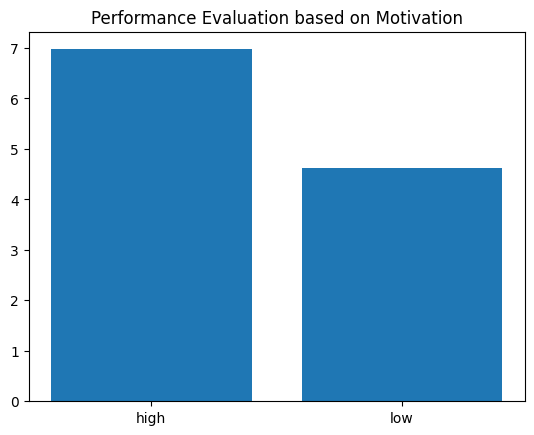

In [ ]:
# bar chart with a title (see Data Understanding ICE, Q6)
plt.bar(x = group_averages.index.values, height = group_averages['Motivation'])
plt.title("Performance Evaluation based on Motivation")
plt.show()

Caption:The performance value high is slightly higher than low because they have a higher motivation to perform to a higher standard.

**Develop a correlation matrix that includes all candidate independent variables, then display the correlation matrix in a color-mapped table. Assume all variables are normally distributed and DO NOT require transformations.**

In [ ]:
# object called x that drops the primary key and DV
x = df.drop(columns=['Manager_ID', 'Performance_Evaluation'])
# replace with code to produce correlation matrix, and display in a color-mapped table (see Correlation Module ICE, Q2C)
cor_matrix = x.corr()
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
Time_Employed,1.000000,0.061650,-0.029708,0.051458,-0.042225
Num_Prev_Positions,0.061650,1.000000,-0.011547,0.023801,-0.009721
Teamwork,-0.029708,-0.011547,1.000000,-0.009434,-0.005895
Motivation,0.051458,0.023801,-0.009434,1.000000,-0.020632
Leadership,-0.042225,-0.009721,-0.005895,-0.020632,1.000000


**Are there any variable pairs that are multicollinear based on a correlation coefficient value cut-off of 0.6? Explain your answer.**

No, all of the values are less than 0.6

# **Part 2: Unsupervised DM (26 pts)**

**Use the `manager_performance_clean.csv` dataset from Canvas. This file is provided so that any errors potentially made during data cleansing portion of the final project do not result in subsequent errors/deductions for the remaining portions of the assignment.**

**Import the clean dataset to Python (or use the original file imported in 1B above) and conduct an unsupervised data mining technique appropriate for this dataset. Think about the data variable types in this dataset and the business question, *then choose from association rules analysis or clustering analysis*.**

> ***HINT: Revisit the ‘summary slide’ for each of the unsupervised data mining techniques to remember what type(s) of data variables can be input into these models.***

---

**Think about what we're interested in figuring out with this manager performance dataset (performance evaluation) and how many classes we have for this variable. Change one parameter in your unsupervised analysis, based on this. (Hint: the number of classes determined above will be used to change this parameter, instead of using some of the other methods we discussed in class.)**

### **A**

**Identify which model was selected and why. The why should focus on the types of data variables in the manager performance dataset. Also discuss any parameters changed in the model and why.**

Clustering analysis was selected because it is unsupervised and the data includes quantitative, qualitative, and ordinal variables. The variables will be normalized in the model. We tested multiple values for the clusters and felt that two clusters was in our best interest.

### **B**

**Perform the unsupervised DM technqiue using your selected model and parameters. Make sure to take any necessary preprocessing steps to ensure the data are in the proper form before running the model (hint: step taken to ensure no variables are over-weighted due to having different units).**

> **After running your analysis, include any relevant results and interpret what they mean. Revisit the previous exercises for the chosen model to remember what the relevant results and interpretations should focus on.**

In [ ]:
!pip install kneed
from kneed import KneeLocator
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # import required libraries and packages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("/content/manager_performance_clean.csv")
#preview the data set
df.head()
df = pd.get_dummies(data = df, drop_first = True) #dummy code categorical variable

In [ ]:
#create an object called features that drops the primary key
#preview this new object
features = df.drop(columns=['Manager_ID'])
features.head()

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation_low
0,8,2,4,10,8,0
1,4,3,8,7,8,0
2,3,3,1,7,5,1
3,9,1,4,4,5,1
4,7,3,3,2,10,1


In [ ]:
#use the standard scaler function (see cheat sheet in clustering analysis module)
#normalize features
scaler = StandardScaler() #save this function to an object called scaler
scaled_features = scaler.fit_transform(features) #perform normalization transformation on your selected variables

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features) #set model parameters, update n_clusters appropriately

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
centroids = kmeans.cluster_centers_ #save centroids from kmeans analysis to object called 'centroids'
centroid_table = pd.DataFrame(centroids, #create table where values of table cells are the centroids
                              columns = features.columns,  #set the names of the columns based on what variables were included in the analysis,
                              index =['Low Performers', 'High Performers']) #set the index to the names of each cluster, here k = 5)
centroid_table #display table

# replace with code to create a normalized centroid table (see clustering cheat sheet)

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation_low
Low Performers,-0.162733,-0.224743,-0.264055,-0.278553,-0.232383,0.720942
High Performers,0.313095,0.432399,0.508035,0.535929,0.447100,-1.387075


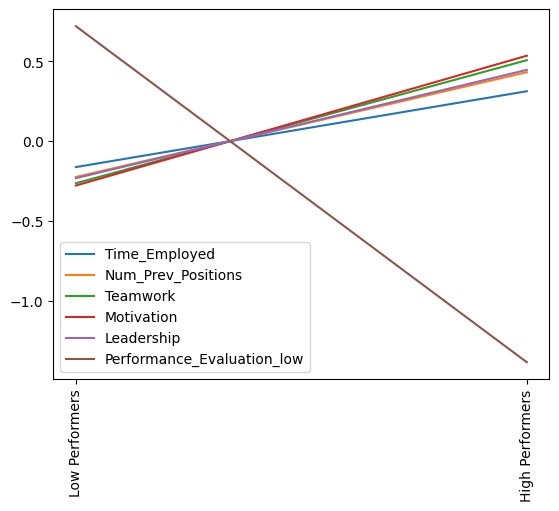

In [ ]:
 # run this code block to produce the centroid plot
 ax = centroid_table.plot()
 ax.set_xticks(range(0,len(centroid_table))) # this sets the number of ticks on the x-axis to your number of clusters
 ax.set_xticklabels(centroid_table.index.values, rotation=90) # this sets your tick labels on the x-axis to your cluster labels
 plt.show()

**Results interpretation for ALL of the results generated in 2B**:

According to the centroid table we can interpret that high performance is correlated with higher numerical values of time employed, number of previous positions, teamwork, motivation, and leadership compared to low performance which has lower values in these areas.

High performers tend to perform above the mean, while a low performer will perform below the mean.

### **C**

**Create at least one visualization with a caption or description about how this visualization contributes towards a *meaningful* interpretation of the manager performance data. Refer to the data understanding module ICE or cheat sheet for code on how to produce relevant visualizations, then label it and provide a brief caption.**

**You may choose to focus on only one or two variables, it does not need to include all variables. Imagine you're presenting this analysis to your supervisor or another stakeholder. Create a visualization you would use to illustrate a trend you noted in the Part 2 analysis.**

In [ ]:
unscaled = scaler.inverse_transform(centroids)
unscaled_table = pd.DataFrame(unscaled, #create table where values of table cells are the centroids
                              columns = features.columns, #set the names of the columns based on what variables were included in the analysis,
                              index =['Low Performers', 'High Performers']) #set the index to the names of each cluster, here k = 5

unscaled_table

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation_low
Low Performers,6.720365,1.227964,4.577508,4.617021,4.740122,1.000000e+00
High Performers,8.906433,1.967836,6.807018,6.973684,6.728070,-1.443290e-15


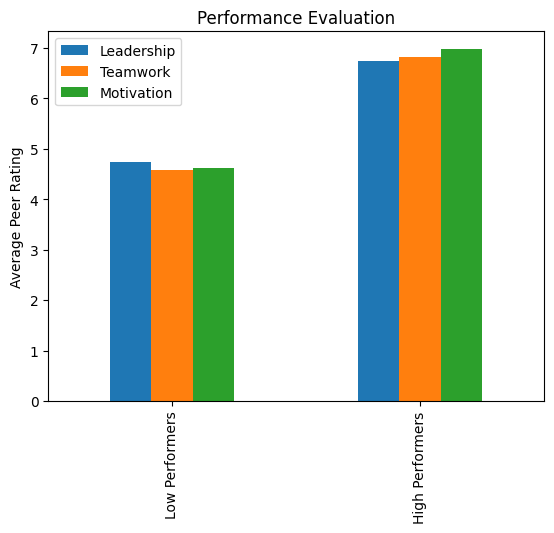

In [ ]:
unscaled_table.plot(kind = 'bar', y = ['Leadership', 'Teamwork', 'Motivation']) #select which variables from clustering analysis to plot
plt.title("Performance Evaluation")
plt.ylabel("Average Peer Rating")
plt.show()
# replace with code to produce plot -- see Data Understanding Module cheat sheet or ICE for code on producing visualizations

Caption: This a bar chart that displays the mean performance score for motivation, teamwork, and leadership between high and low performers. It shows that high performers have a greater peer rating in these areas compared to low perfomers.

# **Part 3: Superviesd DM Technque 1 (27 pts)**

**Using the `manager_performance_clean.csv` file from Canvas, develop a supervised data mining model in Python. You will compare this chosen supervised DM model to a different supervised DM model later on in the assignment (Part 5). Think about the dependent variables and its data type in this dataset, then for Part 3 of the final project *choose between linear regression or decision tree analysis.* Referring to the summary pages for each of these methods from the lecture slides would be useful here.**

## A

**First, identify which model (between linear regression and decision trees) you have chosen and *why*. Focus on the data variable types and the dependent variable in the manager performance dataset. HINT: Think about different types of supervised models we've learned about - regression vs classification.**


The model we chose was descision trees. We chose this model because it is a supervised analysis that uses numerical data as well as categorical data for predictor variables. Decision trees are used to predict the value of a categorical variable such as high or low performance evaluation.

## B

**Train and evaluate your model using 10-fold cross-validation and provide any relevant plots and results. Interpret these results based on the positive class being `Performance_Evaluation_low`. DO NOT EVALUATE YOUR MODEL ON THE TEST SET UNTIL PART 5.**

> **Use a 80-20 training and test-set split, then perform 10-fold cross validation on the training set. For this model, set `min_samples_leaf` to 8, `max_depth` to 10, and `criterion` to "gini". Do not set the min_impurity_decrease parameter (don't include this code). Evaluate the cross-validated accuracy, kappa, lift, precision, recall, and f-measure; then generate a confusion matrix to compare the actual classes of the DV from the training set (e.g., y_train), against the predicted classes (y_pred).**

**Do not just restate the results. Tell me what these results *mean*. Revisit the previous exercises and cheat sheets for the chosen model and model performance module to remember what the relevant steps are and what the interpretation should focus on.**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [ ]:
df = pd.read_csv("/content/manager_performance_clean.csv")
#preview the data set
df.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
# x and y objects (see decision trees cheat sheet)
x = df.drop(['Manager_ID', 'Performance_Evaluation'], axis=1) #drop out primary key and DV columns
x = pd.get_dummies(data = x, drop_first = False) #make sure to NOT leave out a reference group

y = df['Performance_Evaluation']

In [ ]:
# training-test split (see decision trees cheat sheet)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100)
#print each of the 4 data frames (train and test for x and y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 5)
(200, 5)
(800,)
(200,)


In [ ]:
# replace with code to specify model and set parameters according to directions (decision trees cheat sheet)
model = DecisionTreeClassifier(criterion="gini", random_state=100,
                               max_depth=10, min_samples_leaf=8)

In [ ]:
# replace with code to fit model to training set
model.fit(x_train, y_train)
#replace with code to produce tree plot on training data (see decision trees cheat sheet)
labels = y.value_counts()

In [ ]:
# convert label index values to string in order to be used in tree
label = str(labels.index.values)

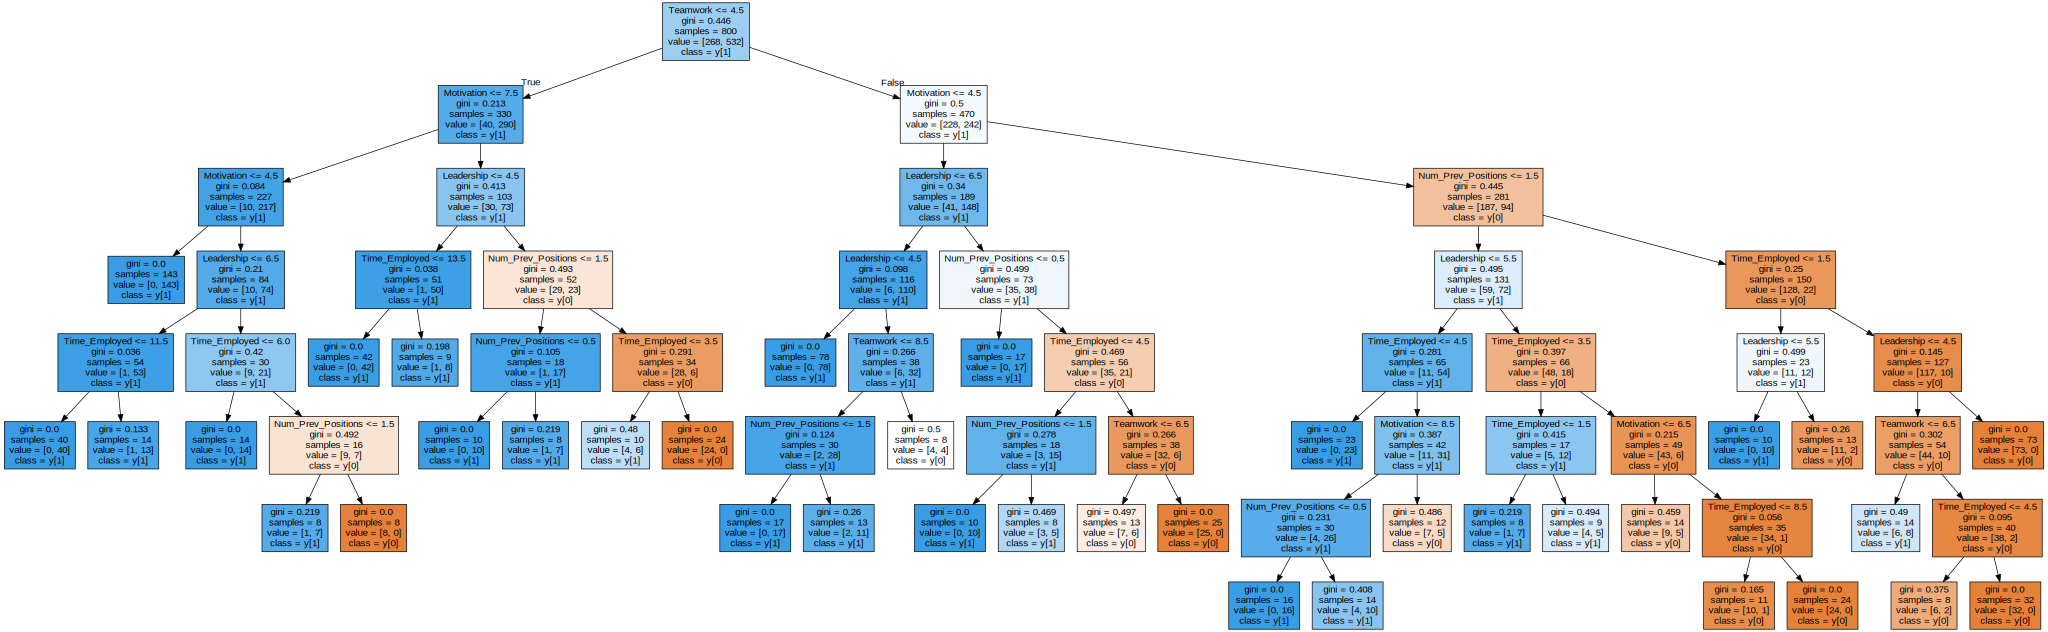

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=x.columns,
                                class_names=True,
                                filled=True) #plot model

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# parameters for a 10-fold cross-validation
cv = KFold(n_splits = 10, random_state = 1, shuffle = True) # replace n with 5, 10, or other value

In [ ]:
# perform 10-fold cross-validated predictions on training set (model performance cheat sheet)
y_pred = cross_val_predict(model, x_train, y_train, cv = cv)
x_train['predicted_class'] = y_pred # add predictions to x_train dataframe
x_train['actual_class'] = y_train # add actual classes to x_train dataframe

x_train.head()#preview headers for x_train

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,predicted_class,actual_class
675,11,2,9,6,6,high,high
358,1,1,1,8,6,low,low
159,12,0,9,8,10,high,high
533,6,3,1,8,2,low,low
678,10,3,6,8,4,high,high


In [ ]:
# classification report
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

        high       0.83      0.82      0.83       271
         low       0.91      0.91      0.91       529

    accuracy                           0.88       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.88      0.88      0.88       800



In [ ]:
#produce Cohen's Kappa value
metrics.cohen_kappa_score(y_pred, y_train)

0.7398091934084996

In [ ]:
#generate value counts for the DV
df['Performance_Evaluation'].value_counts()

low     658
high    342
Name: Performance_Evaluation, dtype: int64

In [ ]:
#calculate naive baseline accuracy
print('baseline accuracy =', 658/len(df))

baseline accuracy = 0.658


In [ ]:
#produce lift value
print('lift =', 0.91/0.658)

lift = 1.3829787234042552


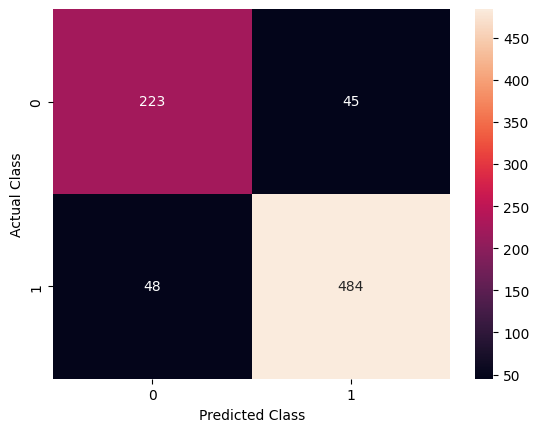

In [ ]:
# replace with code to generate confusion matrix to compare predicted classes to actual outcomes (model performance cheat sheet)
conf = confusion_matrix(y_train, y_pred)

sns.heatmap(conf, annot=True, fmt='g') # display confusion matrix as a heatmap
sns.set(rc={'figure.figsize':(12,10)})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**Results interpretation for ALL of the results generated in 3B:**

We can interpret the results of Kappa because it measures how well our model is performaning above chance. It ranges from 0-1, 1 being better so this value is good. Next, Lift = 1.38 which means that this model performas 1.38 times better than a baseline prediction at identifying truly positive cases. Our model acuracy is 88% which is over 10% better than the baseline accuracy of 65.8%. This improvement justifies the use of the model. The value counts of the DV shows us that the positive in this case the Performance_Evaluation is about double what the negative is. When comparing, we see it as a higher risk for the company to hire someone bad that we thought would be good, then hiring someone who is good that we thought would perform bad. So in this case we would use recall of .91 as the performance measure.


## **C**

**Create at least one visualization with a caption or description about how this visualization contributes towards a *meaningful* interpretation of the manager performance data. Draw from the visualization portion of this course, and create your own relevant visualization, label it, and include a brief caption.**

**You may choose to focus on only one or two variables (i.e., it does not need to include all IVs). Imagine you're presenting this analysis to your supervisor or another stakeholder. Create a visualization you would use to illustrate a trend you noted in the Part 3 analysis.**

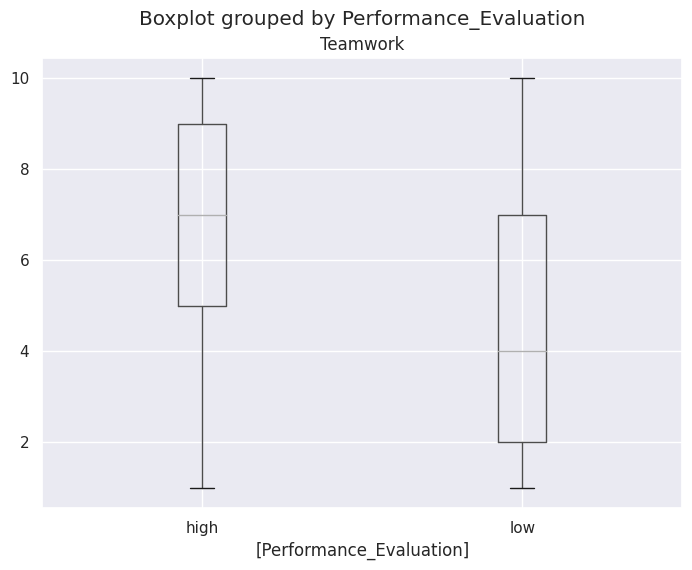

In [ ]:
df.boxplot(column=['Teamwork'], by=['Performance_Evaluation'], figsize=(8,6))
plt.show()
# replace with code for producing plot -- see Data Understanding Module ICE and cheat sheet for code on producing visualizations

**Caption:** This visulization shows two boxplots grouped by the value of Performance_Evaluation (0=False, 1=True). The managers with a performance evaluation of high have a higher teamwork median compared to the low performance evaluation managers.

# **Part 4: Supervised DM Technique 2**

**Using the `manager_performance_clean.csv`, conduct another type of supervised data mining technique in Python. It cannot be decision tree or linear regression (from Part 3). But it should be a data mining technique that can be used on this dataset, so again think about the DV and its data variable type. Referring to the data mining flow chart from the supervised DM lecture might be helpful, or review the summary slides for the supervised DM technqiues covered in this class during lectures.**

## A
**First, identify which model you have chosen and why. Focus on the data variable types and the dependent variable in the manager performance dataset. HINT: Think about different types of supervised models we've learned about - regression vs classification, and don't reuse the model type used in Part 3.**

The model we chose was logistic regression. We chose this model because it is a supervised analysis that uses qualitative data as well as quantitative. Logistic regression is used to predict the log odds of a binominal DV.

## B

**Train and evaluate your model using 10-fold cross-validation and provide any relevant plots and results. Interpret these results based on the positive class being `Performance_Evaluation_low`. DO NOT EVALUATE YOUR MODEL ON THE TEST SET UNTIL PART 5.**

> **Use a 80-20 training and test-set split, then perform 10-fold cross validation on the training set. Evaluate the cross-validated accuracy, kappa, lift, precision, recall, and f-measure; then generate a confusion matrix to compare the actual classes of the DV from the training set (e.g., y_train), against the predicted classes (y_pred).**

> **Also note that we are focused on prediction for this assignment, not interpretation. Generation of a model summary table is NOT required.**

> **When performing the `train_test_split`, set your `test_size = 0.2`, `random_state` to 100.**

> **When performing cross-validation, set your random_state to 1. Failing to complete this step may results in your group members having different training and test sets and different cross-validation results!!!**

**Do not just restate the results. Tell me what these results *mean*. Revisit the previous exercises and cheat sheets for the chosen model and model performance module to remember what the relevant steps are and what the interpretation should focus on.**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/manager_performance_clean.csv")
#preview the data set
df.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
x = df.drop(['Manager_ID', 'Performance_Evaluation'], axis=1) #remove primary key, the DV, and any collinear variables you may have identified
x = pd.get_dummies(data = x, drop_first = True) #dummy code any categorical IVs

y = df['Performance_Evaluation'] #assign DV to 'y' object
y = pd.get_dummies(data = y, drop_first = True) #dummy code the y variable so python treats it as binominal/dichotomous

# replace with code to create x and y objects -- perform any necessary preprocessing (see logistic regression cheat sheet)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100) #set a test and training split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


# replace with code to perform training-test split, random state = 100 (see logistic regression cheat sheet)
#replace with code to print these 4 dataframes for the train and test sets for x and y

(800, 5)
(200, 5)
(800, 1)
(200, 1)


In [ ]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

# replace with code to specify cross-validation parameters -- see model performance cheat sheet for these next few steps

In [ ]:
model = LogisticRegression()
# replace with code to specify model

In [ ]:
scoring = {'acc': 'accuracy',
           'f1' : 'f1',
           'precision' : 'precision',
           'recall' : 'recall',
           'roc_auc' : 'roc_auc',
           'r2' : 'r2'}
# replace with code to create scoring dictionary

In [ ]:
scores = cross_validate(model, x_train, y_train, scoring = scoring, cv = cv, return_train_score=False)

# replace with code to run cross-validated model and produce evaluation metric scores

In [ ]:
scores = pd.DataFrame(scores, columns = scores.keys())
scores.mean()
# replace with code to show scores output (avg over all validation rounds)

fit_time          0.017999
score_time        0.054506
test_acc          0.878750
test_f1           0.909377
test_precision    0.902920
test_recall       0.917016
test_roc_auc      0.954374
test_r2           0.450444
dtype: float64

In [ ]:
df['Performance_Evaluation'].value_counts()
# replace with code to generate value counts for the DV

low     658
high    342
Name: Performance_Evaluation, dtype: int64

In [ ]:
print('baseline accuracy =', 658/len(df))
#replace with code to calculate the naive baseline accuracy

baseline accuracy = 0.658


In [ ]:
y_pred = cross_val_predict(model, x_train, y_train, cv = cv) # create a y_pred object
metrics.cohen_kappa_score(y_train, y_pred)

#replace with code to produce the Cohen's Kappa value

0.7255778425326054

In [ ]:
lift = 0.902920/0.658
#replace with code to produce the lift value
print('lift =', lift)

lift = 1.3722188449848023


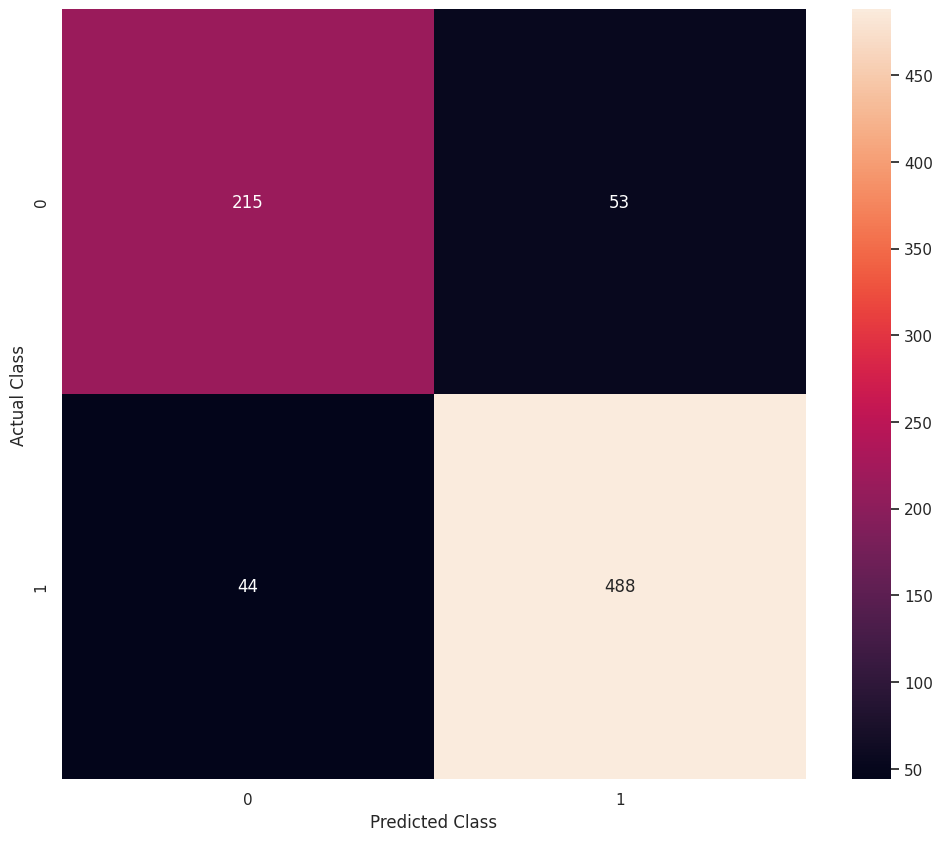

In [ ]:
y_pred = cross_val_predict(model, x_train, y_train, cv = cv) # if you haven't already done so, create y_pred object
conf = confusion_matrix(y_train, y_pred) # generate confusion matrix on y_train against y_pred

sns.heatmap(conf, annot=True, fmt='g') # display confusion matrix as a heatmap
sns.set(rc={'figure.figsize':(12,10)})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# replace with code to produce confusion matrix (model performance cheat sheet)

**Results Interpretation for ALL of the results generated in 4B:**

We can interpret the results of Kappa because it measures how well our model is performaning above chance. It ranges from 0-1, 1 being better so this value is good. Next, Lift = 1.37 which means that this model performs 1.37 times better than a baseline prediction at identifying truly positive cases. Our model acuracy is 88% which is over 10% better than the baseline accuracy of 65.8%. This improvement justifies the use of the model. The value counts of the DV shows us that the positive in this case the Performance_Evaluation is about double what the negative is. When comparing, we see it as a higher risk for the company to hire someone bad that we thought would be good, then hiring someone who is good that we thought would perform bad. So in this case we would use recall of .917 as the performance measure.


## **C**

**Create at least one visualization with a caption or description about how this visualization contributes towards a *meaningful* interpretation of the manager performance data. Draw from the visualization portion of this course, and create your own relevant visualization, label it, and include a brief caption.**

**You may choose to focus on only one or two variables (i.e., it does not need to include all IVs). Imagine you're presenting this analysis to your supervisor or another stakeholder. Create a visualization you would use to illustrate a trend you noted in the Part 3 analysis.**

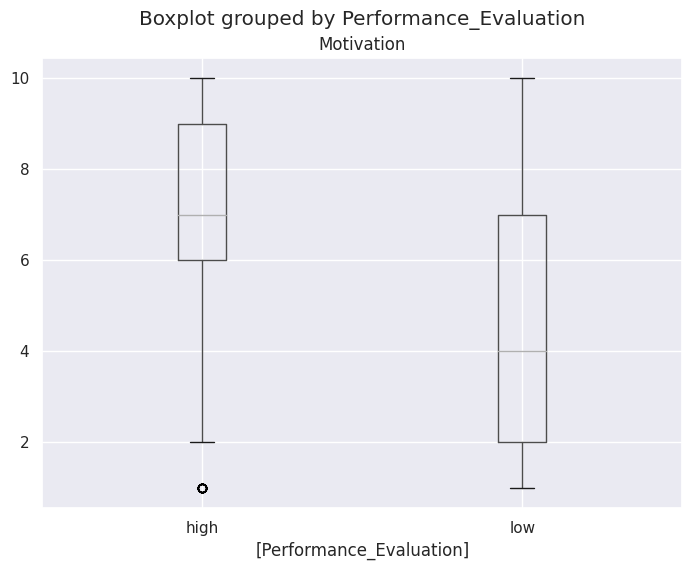

In [ ]:
# replace with code to produce plot -- see Data Understanding Module ICE or cheat sheet for how to produce visualizations
df.boxplot(column=['Motivation'], by=['Performance_Evaluation'], figsize=(8,6))
plt.show()

**Caption:** This visulization shows two boxplots grouped by the value of Performance_Evaluation_low (0=False, 1=True). The managers with a performance evaluation of high have a higher motivation median compared to the low performance evaluation managers. High performance managers also have one outlier.

# **Part 5: Evaluation of Models & Business Recommendations (50 points)**

**Compare the results of the two supervised DM technqiues by presenting their scores in a dataframe in the form of a table. The index should be set to indicate the model (e.g., model_1, model_2), and the columns should indicate the evaluation metric (e.g., precision, recall, etc.).**

In [ ]:
model_1 = (0.91, 0.91, 0.91, 0.88, 0.74, 1.38) #replace each with applicable values for precision, recall, f-1, accuracy, kappa, and lift
model_2 = (0.90, 0.92, 0.91, 0.88, 0.73, 1.37)  #replace each with applicable values for precision, recall, f-1, accuracy, kappa, and lift

models = model_1, model_2

model_compare = pd.DataFrame(data = models,
                        index = ["model_1", "model_2"],
                        columns = ["precision",
                                   "recall",
                                   "f-1",
                                   "accuracy",
                                   "kappa",
                                   "lift"])
model_compare

,precision,recall,f-1,accuracy,kappa,lift
model_1,0.91,0.91,0.91,0.88,0.74,1.38
model_2,0.90,0.92,0.91,0.88,0.73,1.37


## **B**

**Which model performed better and why? Which performance metrics (list their values) were used to determine this and why?**

When taking into account the cost of false negatives and uneven class distribtuion we believe that model 2 is the best option to assess Performance Evaluation. Based off of this information, the performance metric of recall would be most valuable. The recall of model 1 was 0.91. The recall of model 2 was 0.92.

## C

**Fit whichever model you chose as the best-performing model to the test-set, then run a classification report. Do the evaluation metrics drop considerably or not? What does this potentially indicate?**

In [ ]:
model = LogisticRegression()
# replace with code to specify model

model.fit(x_train, y_train)
# replace with code to fit model to x_train and y_train

predictions = model.predict(x_test)
# replace with code to predict onto x_test

print(classification_report(y_test, predictions))
# replace with code to print the classification report

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        74
           1       0.90      0.97      0.93       126

    accuracy                           0.92       200
   macro avg       0.92      0.90      0.91       200
weighted avg       0.92      0.92      0.91       200



The precision metric stayed the same at .90. The recall metric increased from .92 to .97 which indicates a more acurate model with less false negatives. The f1-score increased from .91 to .93 which indicates a more precise model when compared to 1 which is perfect.


Overall this indicates that this model performed comparatively better. The model is not overfit because the closeness of the performance metrics.


## D

**What business recommendations can be made after this analysis? Please write an Executive Summary (1 paragraph) including the following:**



1.   **Note the business problem**
2.   **Briefly describe the steps taken to resolve the business problem**
3.   **Indicate your level of confidence that your best-performing model will generalize to new data on managers performance**
4.   **Briefly describe your business recommendations; what might be some important characteristics (based on our IVs) to consider when hiring new managers?**



The business problem in this dataset is to determine how prospective managers will perform. First we prepared the dataset by cleaning it and began to understand the individual performance attributes that we would use to evaluate prospective managers. Then we used data mining techniques to make eduacated decisions such as clustering analysis,  logistic regression, and decision trees. Finally we were able to compare the different models and determine which one is best for the business problem. Based off of our model accuracy, f-1 score, etc., we can compare our model to the baseline accuracy and feel confident that our best perfoming model will be able to generalize to new data on managers performance. We would recommend to the HR director to consider the higher risk of  hiring someone who is a low performer that we thought would be a high performer, then hiring someone who is a high performer that we thought would be a low performer, this can be costly to the company. We felt that motivation, teamwork, and leadership were the most impactful characteristics to consider when hiring new managers.Other characteristics such as time employed and number previous positions held are still used in the model but have less of an impact.